# Team Project 2 - Interpolation

In this project, we investigate various aspects of polynomial interpolation and spline interpolation.

There are several essential NumPy routines.
<ul>
    <li><a href="https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.polynomials.classes.html">Polynomial</a> routine enables identifying a vector $[a, b, c, \cdots]$ with a polynomial $a + bx + cx^2+ \cdots$ and manipulating it;</li>
    <li><a href="https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.linalg.html">Linear algebra</a> routine could be used to do some basic linear algebra;</li>
    <li><a href="https://matplotlib.org/users/pyplot_tutorial.html">Pyplot</a> is used to plot graphs.</li>
</ul>

You may find some information and examples by clicking the name of each routine. Also, check the Python tutorial that I posted on Blackboard, at the beginning of this semester.

For the first three problems, $f(x) = \frac{1}{1+x^2}$. We will compute several approximations of $f(x)$ on $[-5, 5]$, coming from various interpolations of sample points on the graph of $f(x)$.

1. (10 pts) Let $\mathrm{sample} = [x_0, x_1, \cdots, x_n]$ be a list of (not necessarily equally spaced) numbers such that $x_j < x_{j+1}$. Construct a python function **Lagrange(sample)** that calculates the polynomial interpolation $p_n(x)$ of $\{(x_0, f(x_0)), (x_1, f(x_1)), \cdots, (x_n, f(x_n))\}$ on $[x_0, x_n]$ using <em>Lagrange interpolation</em>.

Using this, find the polynomial interpolation $p_{9}(x)$ of $\{(x_0, f(x_0)), (x_1, f(x_1)), \cdots, (x_9, f(x_9))\}$ of degree $\le 9$ with:

(a) evenly spaced sample points $x_0 = -5, x_1, x_2, \cdots, x_9 = 5$,

(b) $x_0 = 5\cos(\frac{19}{20}\pi), x_1 = 5\cos(\frac{17}{20}\pi), x_2 = 5\cos(\frac{15}{20}\pi), \cdots, x_9 = 5\cos(\frac{1}{20}\pi)$,

and sketch the graph of $f(x)$ and $p_{9}(x)$ with these two sets of sample points on the same plane (for $-5 \le x \le 5$).

In [ ]:
import numpy as np
from numpy.polynomial import Polynomial as P
import matplotlib.pyplot as plt

Lagrange Polynomial at Approximately Spaced Points: 
 0.86153815 - (3.76102957e-16)·x - 0.33043693·x² + (2.8594477e-16)·x³ +
0.04916565·x⁴ + (4.80166037e-17)·x⁵ - 0.00287459·x⁶ -
(2.95063927e-18)·x⁷ + (5.53594234e-05)·x⁸ - (1.66097867e-20)·x⁹ 

Lagrange Polynomial at Precisly Spaced Points: 
 0.73082166 + (2.97965862e-16)·x - 0.19246499·x² - (1.07444435e-16)·x³ +
0.02019086·x⁴ - (1.80248611e-18)·x⁵ - 0.00089616·x⁶ +
(2.28698896e-19)·x⁷ + (1.41126971e-05)·x⁸ - (5.53218394e-21)·x⁹


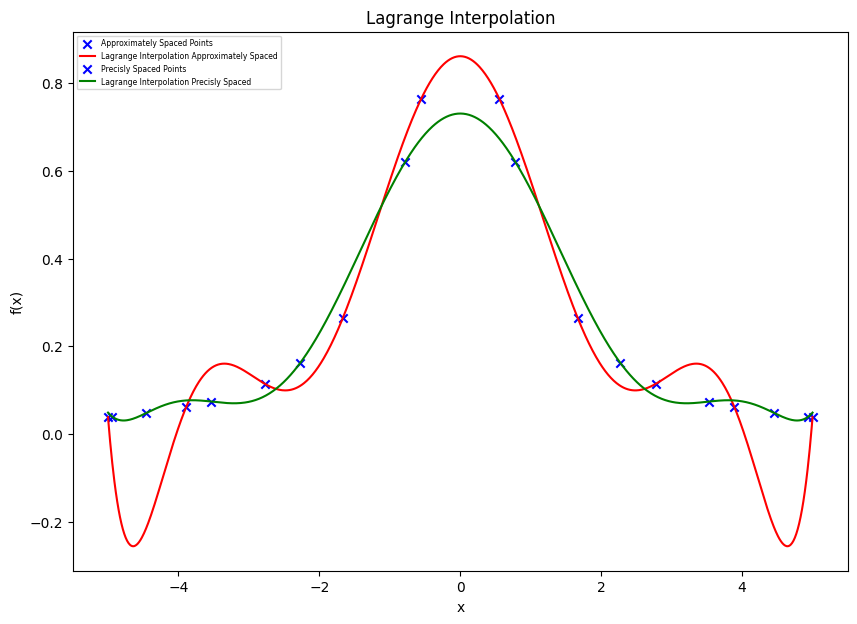

In [ ]:
def Lagrange(x_vals, y_vals):

  n = len(x_vals)
  poly = P([0])

  for i in range(n):
    term = P([y_vals[i]])
    base = P([1])

    for j in range(n):
      if i != j:
        base *= P([-x_vals[j], 1]) / (x_vals[i] - x_vals[j])

    poly += term * base
  return poly


def fx(x): # computes function
  return 1 / (1 + x**2)

#(a)
x_vals_approx = np.linspace(-5,5,10)
y_vals_approx = fx(x_vals_approx)

interp_approx = Lagrange(x_vals_approx, y_vals_approx)
print("Lagrange Polynomial at Approximately Spaced Points: \n", interp_approx, "\n")

#(b)
x_vals_precise = np.array([5 * np.cos((k / 20) * np.pi) for k in range(19, 0, -2)])
y_vals_precise = 1 / (1 + x_vals_precise**2)

interp_precise = Lagrange(x_vals_precise, y_vals_precise)
print("Lagrange Polynomial at Precisly Spaced Points: \n", interp_precise)

#graph sketch
def plot_graph():
  plt.figure(figsize =(10,7))

  x_plot = np.linspace(-5, 5, 1000)
  y_actual = fx(x_plot)
  y_interp_approx = interp_approx(x_plot)
  y_interp_precise = interp_precise(x_plot)

  #evenly spaced points
  plt.scatter(x_vals_approx, y_vals_approx, color="blue", marker="x", label="Approximately Spaced Points")
  plt.plot(x_plot, y_interp_approx, label='Lagrange Interpolation Approximately Spaced', color="red")

  #precisly spaced points
  plt.scatter(x_vals_precise, y_vals_precise, color="orange", marker="x", label="Precisly Spaced Points")
  plt.plot(x_plot, y_interp_precise, label='Lagrange Interpolation Precisly Spaced', color="green")

  #settings
  plt.xlabel("x")
  plt.ylabel("f(x)")
  plt.title("Lagrange Interpolation")
  plt.legend(loc="upper left", fontsize=5.5)
  plt.show()

plot_graph()

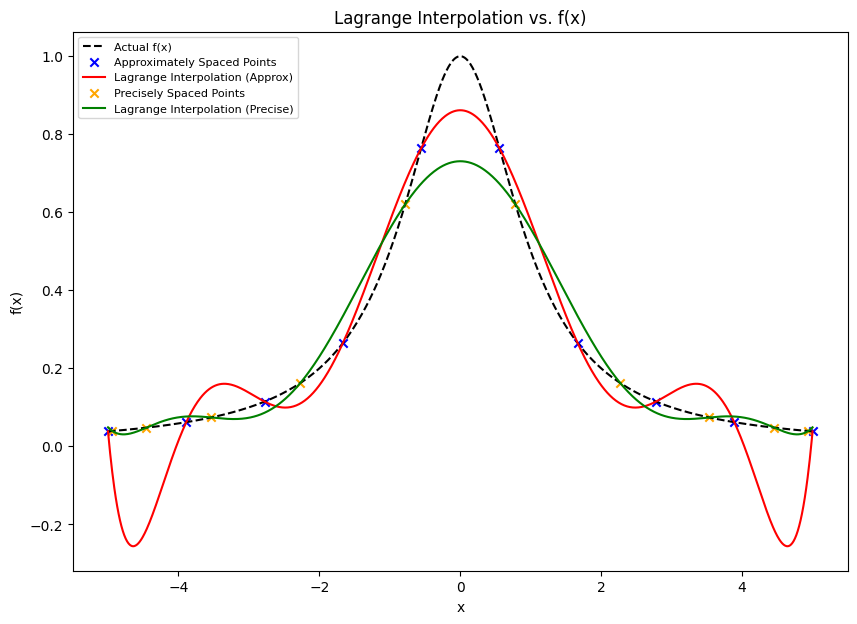

In [ ]:
def fx(x):  # Function f(x) = 1 / (1 + x^2)
    return 1 / (1 + x**2)

def Lagrange(x_vals):
    y_vals = fx(x_vals)  # Compute function values inside the function
    n = len(x_vals)
    poly = P([0])  # Initialize polynomial to 0

    for i in range(n):
        term = P([y_vals[i]])  # Start with f(x_i)
        base = P([1])  # Start with 1 for multiplication

        for j in range(n):
            if i != j:
                base *= P([-x_vals[j], 1]) / (x_vals[i] - x_vals[j])  # Construct Lagrange basis

        poly += term * base  # Add term to polynomial
    return poly

# (a) Evenly spaced sample points
x_vals_approx = np.linspace(-5, 5, 10)
interp_approx = Lagrange(x_vals_approx)

# (b) Precisely spaced sample points
x_vals_precise = np.array([5 * np.cos((k / 20) * np.pi) for k in range(19, 0, -2)])
interp_precise = Lagrange(x_vals_precise)

# Graph sketch including f(x)
def plot_graph():
    plt.figure(figsize=(10, 7))
    x_plot = np.linspace(-5, 5, 1000)
    y_actual = fx(x_plot)  # Actual function values
    y_interp_approx = interp_approx(x_plot)
    y_interp_precise = interp_precise(x_plot)

    # Plot f(x)
    plt.plot(x_plot, y_actual, label='Actual f(x)', color="black", linestyle="dashed")

    # Evenly spaced points
    plt.scatter(x_vals_approx, fx(x_vals_approx), color="blue", marker="x", label="Approximately Spaced Points")
    plt.plot(x_plot, y_interp_approx, label='Lagrange Interpolation (Approx)', color="red")

    # Precisely spaced points
    plt.scatter(x_vals_precise, fx(x_vals_precise), color="orange", marker="x", label="Precisely Spaced Points")
    plt.plot(x_plot, y_interp_precise, label='Lagrange Interpolation (Precise)', color="green")

    # Settings
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title("Lagrange Interpolation vs. f(x)")
    plt.legend(loc="upper left", fontsize=8)
    plt.show()

plot_graph()


2. (10 pts) Let $\mathrm{sample} = [x_0, x_1, \cdots, x_n]$ be a list of (not necessarily equally spaced) numbers such that $x_j < x_{j+1}$. Construct a python function **DivDiff(sample)** that calcuates the polynomial interpolation $p_n(x)$ of $\{(x_0, f(x_0)), (x_1, f(x_1)), \cdots, (x_n, f(x_n))\}$ using <em>divided differences</em>.

Using this, find the polynomial interpolation $p_{9}(x)$ of $\{(x_0, f(x_0)), (x_1, f(x_1)), \cdots, (x_9, f(x_9))\}$ of degree $\le 9$ with:

(a) evenly spaced sample points $x_0 = -5, x_1, x_2, \cdots, x_9 = 5$,

(b) $x_0 = 5\cos(\frac{19}{20}\pi), x_1 = 5\cos(\frac{17}{20}\pi), x_2 = 5\cos(\frac{15}{20}\pi), \cdots, x_9 = 5\cos(\frac{1}{20}\pi)$,

and sketch the graph of $f(x)$ and $p_{9}(x)$ with these two sets of sample points on the same plane (for $-5 \le x \le 5$).

Divided Difference Polynomial at Approximately Spaced Points: 
 0.86153815 - (2.93853145e-16)·x - 0.33043693·x² + (3.1868803e-16)·x³ +
0.04916565·x⁴ - (6.6246147e-17)·x⁵ - 0.00287459·x⁶ + (6.60459823e-18)·x⁷ +
(5.53594234e-05)·x⁸ - (1.58564568e-19)·x⁹ 

Divided Difference Polynomial at Precisly Spaced Points: 
 0.73082166 + (1.84054843e-16)·x - 0.19246499·x² - (1.08463061e-16)·x³ +
0.02019086·x⁴ + (1.00404441e-18)·x⁵ - 0.00089616·x⁶ +
(5.32272377e-19)·x⁷ + (1.41126971e-05)·x⁸ - (1.75220735e-20)·x⁹


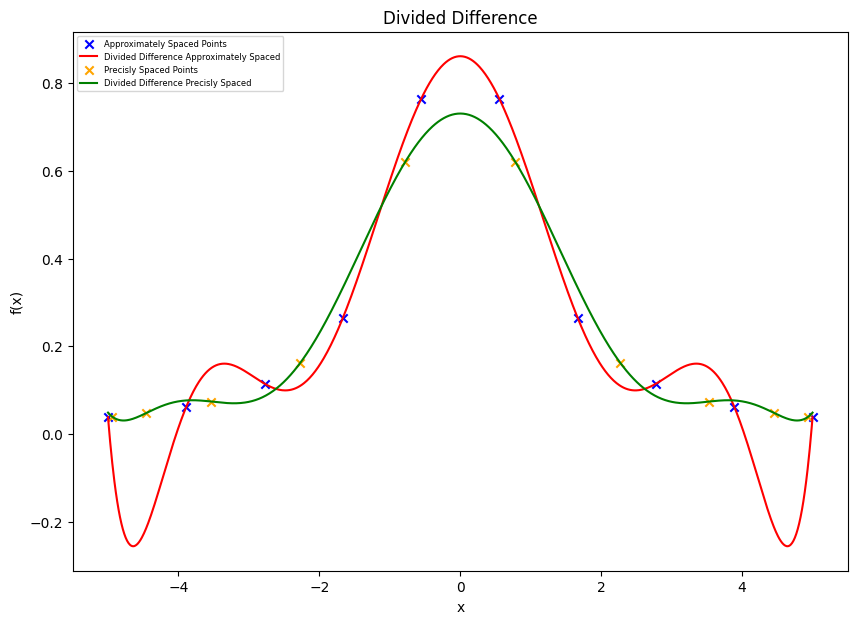

In [ ]:
def DivDiff(x_vals, y_vals):
  n = len(x_vals)
  coef = y_vals.copy()

  for i in range(1, n):
    coef[i:] = (coef[i:] - coef[i-1]) / (x_vals[i:] - x_vals[i-1])

  poly = P([coef[0]])
  term = P([1])

  for i in range(1, n):
    term *= P([-x_vals[i-1], 1])
    poly += coef[i] * term

  return poly


def fx(x): # computes function
  return 1 / (1 + x**2)

#(a)
x_vals_approx = np.linspace(-5,5,10)
y_vals_approx = fx(x_vals_approx)

interp_approx = DivDiff(x_vals_approx, y_vals_approx)
print("Divided Difference Polynomial at Approximately Spaced Points: \n", interp_approx, "\n")

#(b)
x_vals_precise = np.array([5 * np.cos((k / 20) * np.pi) for k in range(19, 0, -2)])
y_vals_precise = 1 / (1 + x_vals_precise**2)

interp_precise = DivDiff(x_vals_precise, y_vals_precise)
print("Divided Difference Polynomial at Precisly Spaced Points: \n", interp_precise)

#graph sketch
def plot_graph():
  plt.figure(figsize =(10,7))
  x_plot = np.linspace(-5, 5, 1000)
  y_actual = fx(x_plot)
  y_interp_approx = interp_approx(x_plot)
  y_interp_precise = interp_precise(x_plot)

  #evenly spaced points
  plt.scatter(x_vals_approx, y_vals_approx, color="blue", marker="x", label="Approximately Spaced Points")
  plt.plot(x_plot, y_interp_approx, label='Divided Difference Approximately Spaced', color="red")

  #precisly spaced points
  plt.scatter(x_vals_precise, y_vals_precise, color="orange", marker="x", label="Precisly Spaced Points")
  plt.plot(x_plot, y_interp_precise, label='Divided Difference Precisly Spaced', color="green")

  #settings
  plt.xlabel("x")
  plt.ylabel("f(x)")
  plt.title("Divided Difference")
  plt.legend(loc="upper left", fontsize=6)
  plt.show()

plot_graph()


3. (10 pts) Let $\mathrm{sample} = [x_0, x_1, \cdots, x_n]$ be a list of (not necessarily equally spaced) numbers such that $x_j < x_{j+1}$. Construct a python function **CubicSpline(sample)** that calcuates the natural cubic spline function $S(x)$ with the sample points $\{(x_0, f(x_0)), (x_1, f(x_1)), \cdots, (x_n, f(x_n))\}$.

Using this, find the natural cubic spline function $S(x)$ with:

(a) evenly spaced sample points $x_0 = -5, x_1, x_2, \cdots, x_9 = 5$,

(b) $x_0 = 5\cos(\frac{19}{20}\pi), x_1 = 5\cos(\frac{17}{20}\pi), x_2 = 5\cos(\frac{15}{20}\pi), \cdots, x_9 = 5\cos(\frac{1}{20}\pi)$,

and sketch the graph of $f(x)$ and $S(x)$ with these two sets of sample points on the same plane (for $-5 \le x \le 5$).

Cubic Splines for Approximated Values:
Spline 0: 0.03846154 + 0.01282078·x + (1.2490009e-17)·x² + 0.00679034·x³
Spline 1: 0.06202144 + 0.03797018·x + 0.02263446·x² - 0.01270167·x³
Spline 2: 0.11473088 + 0.04122574·x - 0.01970445·x² + 0.09367294·x³
Spline 3: 0.26470588 + 0.34437488·x + 0.29253868·x² - 0.17813302·x³
Spline 4: 0.76415094 + 0.33470893·x - 0.30123804·x² + 0.0·x³
Spline 5: 0.76415094 - 0.33470893·x - 0.30123804·x² + 0.17813302·x³
Spline 6: 0.26470588 - 0.34437488·x + 0.29253868·x² - 0.09367294·x³
Spline 7: 0.11473088 - 0.04122574·x - 0.01970445·x² + 0.01270167·x³
Spline 8: 0.06202144 - 0.03797018·x + 0.02263446·x² - 0.00679034·x³


Cubic Splines for Precise Values: 
Spline 0: 0.03938837 + 0.0144753·x + 0.0·x² + 0.01400384·x³
Spline 1: 0.04796781 + 0.02429274·x + 0.02030875·x² - 0.01723848·x³
Spline 2: 0.07407407 + 0.0179162·x - 0.02724354·x² + 0.05397825·x³
Spline 3: 0.16253068 + 0.20832866·x + 0.17769806·x² - 0.07451262·x³
Spline 4: 0.62042685 + 0.2422812·x - 0.15487712·x² 

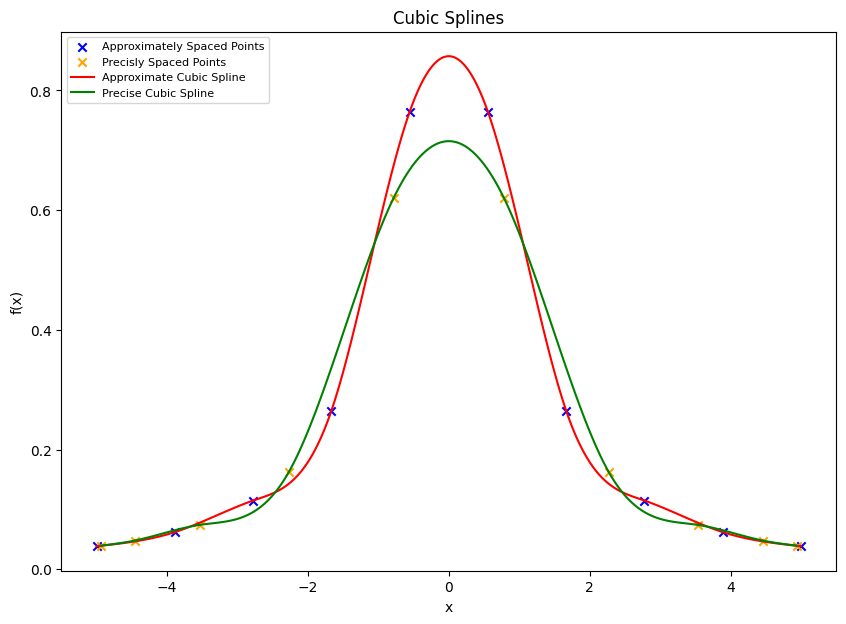

In [ ]:
def CubicSpline(x_vals, y_vals):
  n = len(x_vals) - 1
  h = np.diff(x_vals)

  a = np.zeros(n) # a-values
  for i in range(1, n):
    a[i] = (3/h[i]) * (y_vals[i+1] - y_vals[i]) - (3/h[i-1]) * (y_vals[i] - y_vals[i-1])

  A = np.zeros((n+1, n+1)) # set up matrix
  b = np.zeros(n+1)
  A[0,0], A[n,n] = 1, 1  # boundary conditions

  for i in range(1, n):
      A[i, i-1] = h[i-1]
      A[i, i] = 2 * (h[i-1] + h[i])
      A[i, i+1] = h[i]
      b[i] = a[i]

  c = np.linalg.solve(A, b) # solving for c

  b = np.zeros(n)
  d = np.zeros(n)
  a = y_vals[:-1]

  splines = []
  for j in range(n):
      b[j] = (y_vals[j+1] - y_vals[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
      d[j] = (c[j+1] - c[j]) / (3 * h[j])
      coeffs = [a[j], b[j], c[j], d[j]]
      splines.append(P(coeffs))

  return splines


def fx(x): # computes function
  return 1 / (1 + x**2)

#(a)
x_vals_approx = np.linspace(-5,5,10)
y_vals_approx = fx(x_vals_approx)
spline_approx = CubicSpline(x_vals_approx, y_vals_approx)

print("Cubic Splines for Approximated Values:")
for i, poly in enumerate(spline_approx):
    print(f"Spline {i}: {poly}")

#(b)
x_vals_precise = np.array([5 * np.cos((k / 20) * np.pi) for k in range(19, 0, -2)])
y_vals_precise = 1 / (1 + x_vals_precise**2)
spline_precise = CubicSpline(x_vals_precise, y_vals_precise)

print("\n")
print("Cubic Splines for Precise Values: ")
for i, poly in enumerate(spline_precise):
    print(f"Spline {i}: {poly}")

# graph sketch

def plot_graph():
  plt.figure(figsize =(10,7))
  x_plot = np.linspace(-5, 5, 1000)
  y_actual = fx(x_plot)

  #evenly spaced points
  plt.scatter(x_vals_approx, y_vals_approx, color="blue", marker="x", label="Approximately Spaced Points")

  #precisly spaced points
  plt.scatter(x_vals_precise, y_vals_precise, color="orange", marker="x", label="Precisly Spaced Points")

  for i in range(len(spline_approx)):
      x_range = np.linspace(x_vals_approx[i], x_vals_approx[i + 1])
      y_range = spline_approx[i](x_range - x_vals_approx[i])  # Evaluate spline at transformed x
      plt.plot(x_range, y_range, color="red", label="Approximate Cubic Spline" if i == 0 else "")

    # Plot cubic splines for precisely spaced points
  for i in range(len(spline_precise)):
      x_range = np.linspace(x_vals_precise[i], x_vals_precise[i + 1])
      y_range = spline_precise[i](x_range - x_vals_precise[i])
      plt.plot(x_range, y_range, color="green", label="Precise Cubic Spline" if i == 0 else "")

  #settings
  plt.xlabel("x")
  plt.ylabel("f(x)")
  plt.title("Cubic Splines")
  plt.legend(loc="upper left", fontsize=8)
  plt.show()

plot_graph()


4. (20 pts) In computer graphics, <b>vectorization</b> is the conversion of raster graphics into vector graphics.

Roughly, raster graphics is a graphic format that consists of a collection of colored dots. Examples include JPG, GIF, and PNG formats. Raster graphics are resolution dependent, meaning they cannot scale up to an arbitrary resolution without loss of apparent quality. (If you zoom in a jpg file, then you can see many colored squares.)

On the other hand, vector graphics are defined in terms of points connected by lines and curves to form polygons and other shapes. Typical examples are font files, SVG, and PDF. Because they encode relevant mathematical data, it could be easily scaled up without any loss of quality.

Vectorization or image tracing is a method to convert a given raster graphic data into a vector graphic format. This project will investigate one of the simplest kinds of image tracing by using the spline function. Consider the following image of a turtle:

![turtle.jpg](https://drive.google.com/uc?id=1oOa6agPnBA4hcGsa9nDJ8QXp4I9yeL-U)

What you need to do is trace the contour of the upper part of the turtle's body by using natural cubic spline functions. More precisely, you should calculate a natural cubic spline function $S(x)$ that describes the upper outline of the turtle, starting from the left end of its shell to the rightmost point to its eye.

<ol>
    <li>By using some graphic tool such as Microsoft Paint or Photoshop, find the coordinates of several sample points.</li>
    <li>Compute the natural cubic spline function connecting the sample points.</li>
    <li>Plot your spline function over the image. </li>
</ol>

Your graph of the spline function should have no significant error (I know this is somewhat subjective, but...) compared to the outline of the original image. 10 pts for the correctness of the code. The remaining 10 points are for the best performance, in terms of the <em>number of sample points</em>. For example, the team using the smallest number of sample points will get 10 pts, the next team will get 9 pts, etc. Keep in mind that your spline should not have any significant difference from the original image. It is important which sample points you use. Try several examples and get some lessons.

Cubic Splines for Turtle:
Spline 0: -654.3 + 0.501432·x + (4.20153209e-17)·x² + (4.48700317e-06)·x³
Spline 1: -607.6 + 0.60378737·x + 0.0011738·x² - (2.83738999e-06)·x³
Spline 2: -408.8 + 0.59376126·x - 0.00120961·x² + (1.36571068e-06)·x³
Spline 3: -307.4 + 0.23759617·x - (6.24105918e-05)·x² - (2.93838197e-06)·x³
Spline 4: -313.5 - 0.5212146·x - 0.00258707·x² + (5.40892122e-05)·x³
Spline 5: -344.3 - 0.03049247·x + 0.00929092·x² - (3.68129766e-05)·x³
Spline 6: -263.3 + 0.2257426·x - 0.00761728·x² + (2.42048856e-05)·x³


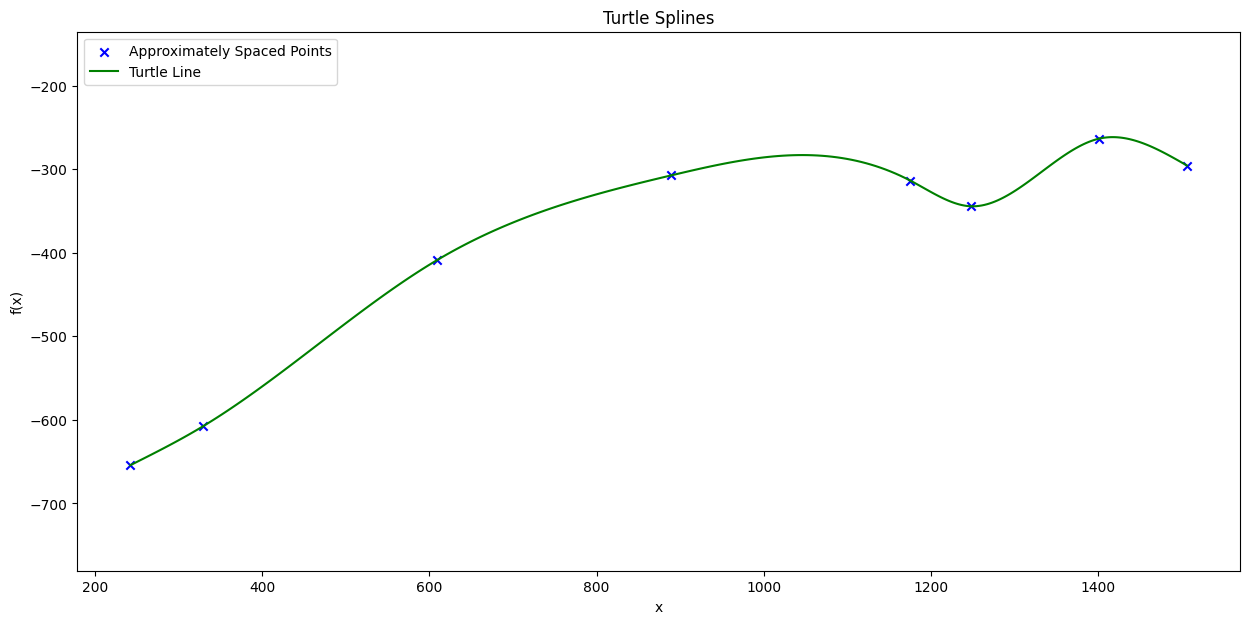

In [ ]:
x = np.array([241.8, 329, 609, 889, 1175.4, 1248.6, 1401.7, 1506.6])
y = np.array([-654.3, -607.6, -408.8 ,-307.4, -313.5, -344.3, -263.3, -295.5])

turtle_spline = CubicSpline(x, y)

print("Cubic Splines for Turtle:")
for i, poly in enumerate(turtle_spline):
    print(f"Spline {i}: {poly}")

def plot_graph():
  plt.figure(figsize =(15,7))
  x_plot = np.linspace(-5, 5, 1000)
  y_actual = fx(x_plot)

  plt.axis("equal")
  plt.gca().set_aspect('equal', adjustable='datalim')


  #evenly spaced points
  plt.scatter(x, y, color="blue", marker="x", label="Approximately Spaced Points")


    # Plot cubic splines for precisely spaced points
  for i in range(len(turtle_spline)):
      x_range = np.linspace(x[i], x[i + 1])
      y_range = turtle_spline[i](x_range - x[i])
      plt.plot(x_range, y_range, color="green", label="Turtle Line" if i == 0 else "")

  #settings
  plt.xlabel("x")
  plt.ylabel("f(x)")
  plt.title("Turtle Splines")
  plt.legend(loc="upper left", fontsize=10)
  plt.show()

plot_graph()



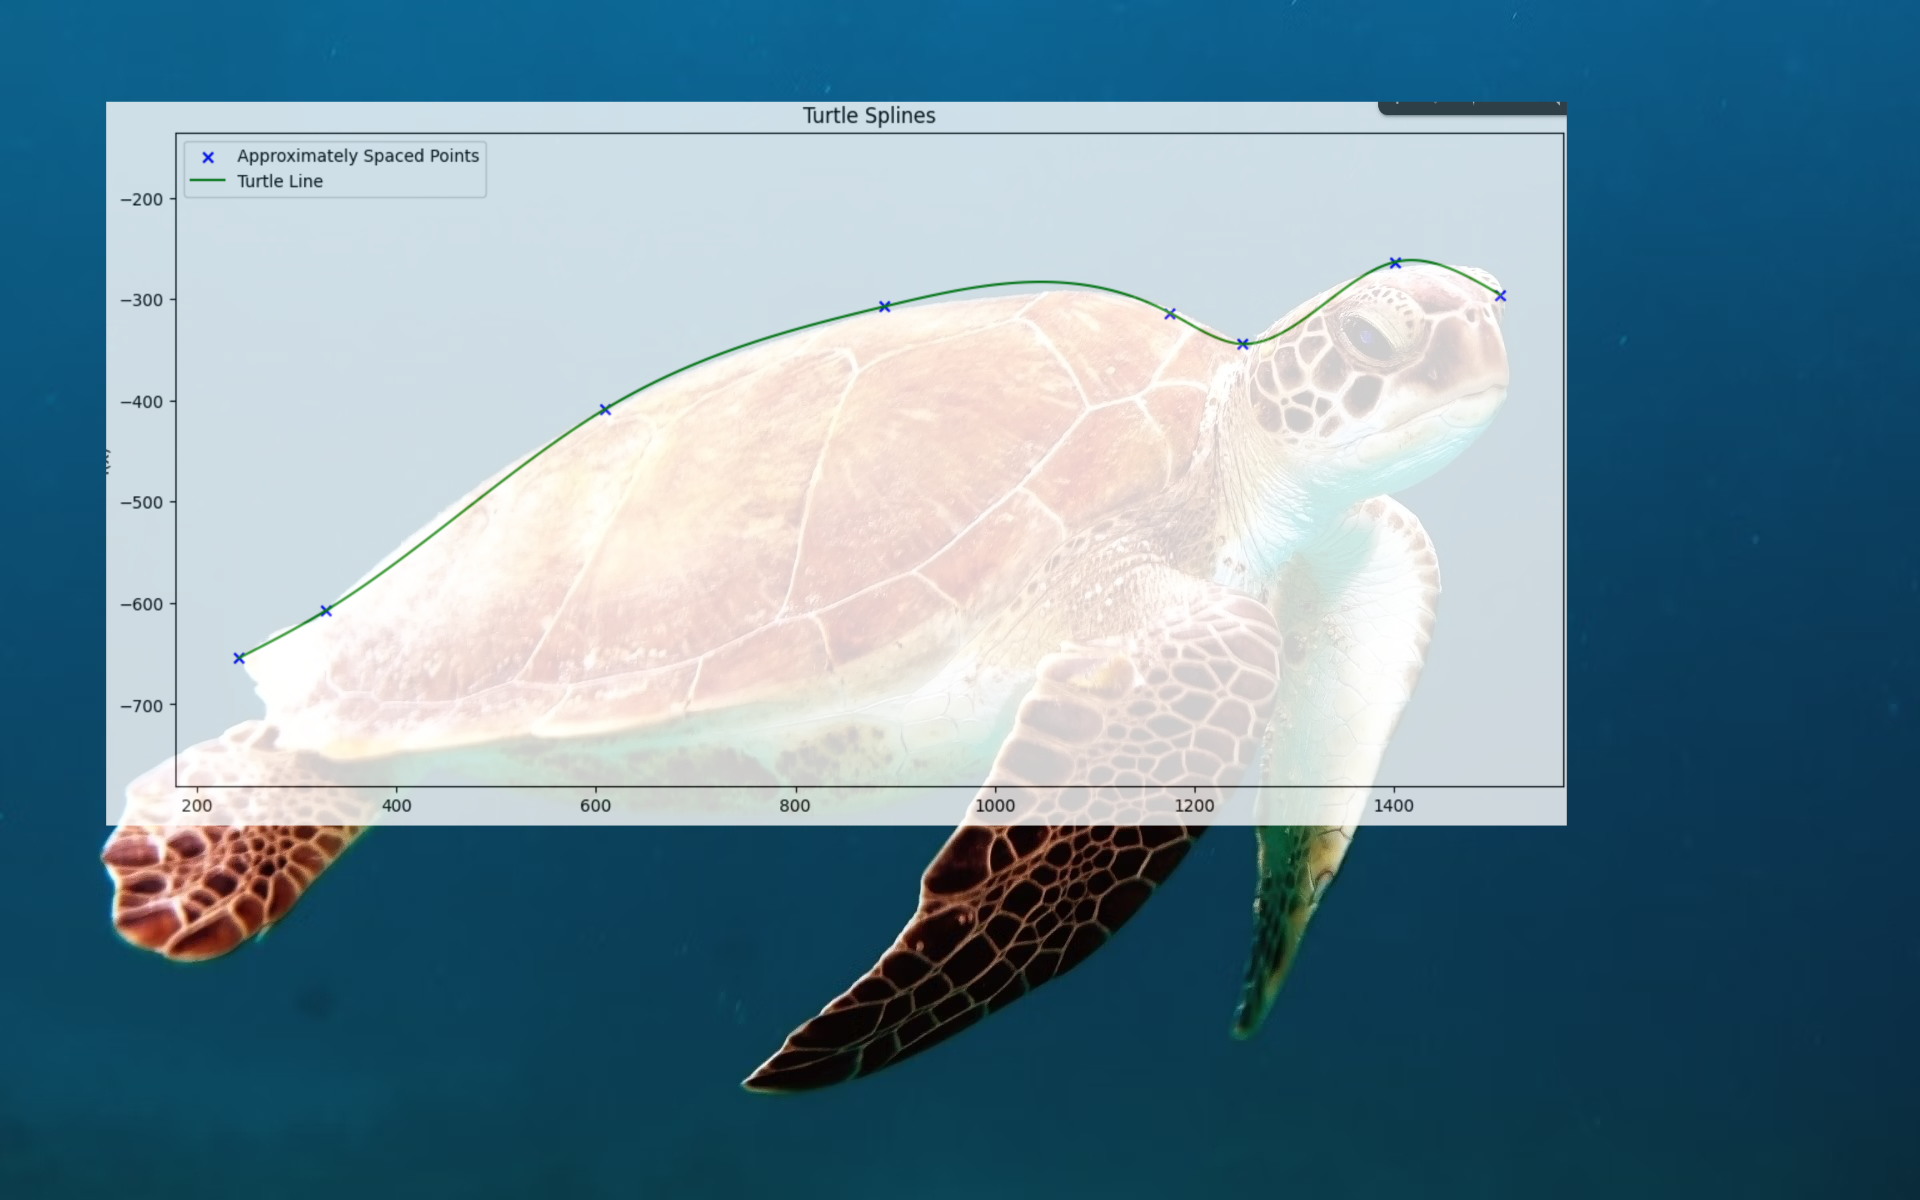